CSCI P-556: Applied Machine Learning

Fall 2019

Assignment 4

Due: 11:59PM, December 6, 2019

Read dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from keras import Sequential
from keras.layers import Dense
from google.colab import drive
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

train = pd.read_csv('/content/drive/My Drive/Assignment-4/a4-train.csv', index_col=0)
test = pd.read_csv('/content/drive/My Drive/Assignment-4/a4-test.csv', index_col=0)

Using TensorFlow backend.


In [2]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# combining both the data for EDA
data_set=pd.concat([train,test],axis=0)

#### Logistic Regression

In [0]:
#  Takes test and train data and return the accuracy

def logistic_regression(train,test):
    logistic_regressor=LogisticRegression()
    x_train=train.drop(["labels"],axis=1)
    y_train=train[["labels"]]

    #fitting the model
    logistic_regressor.fit(x_train,y_train)

    #prediction
    x_test=test.drop(["labels"],axis=1)
    y_test=test[["labels"]]
    y_predict=logistic_regressor.predict(x_test)

    #accuracy calculation
    accuracy_lr = logistic_regressor.score(x_test, y_test)
    return accuracy_lr

#### Support Vector Machine

In [0]:
#  Takes test and train data and return the accuracy

def svm(train,test):
    svm_regr = SVC()
    #train data
    x_train=train.drop(["labels"],axis=1)
    y_train=train[["labels"]]
    
    #test data
    x_test=test.drop(["labels"],axis=1)
    y_test=test[["labels"]]
    
    svm_regr.fit(x_train, y_train)
    accuracy_svm=svm_regr.score(x_test,y_test)
    return accuracy_svm

#### K-Nearest Neighbours

In [0]:
def knn(train,test,k):
    knn_regr = KNeighborsClassifier(n_neighbors=k,metric="euclidean")
    #train data
    x_train=train.drop(["labels"],axis=1)
    y_train=train[["labels"]]
    
    #test data
    x_test=test.drop(["labels"],axis=1)
    y_test=test[["labels"]]
    
    knn_regr.fit(x_train,y_train)
    accuracy_knn=knn_regr.score(x_test,y_test)
    return accuracy_knn


#### Decision Tree

In [0]:
def decision_tree(train,test):
    
    decision_tree_regr = DecisionTreeClassifier(criterion="entropy")
    #train data
    x_train=train.drop(["labels"],axis=1)
    y_train=train[["labels"]]
    
    #test data
    x_test=test.drop(["labels"],axis=1)
    y_test=test[["labels"]]
    
    decision_tree_regr.fit(x_train,y_train)
    y_test_DT=decision_tree_regr.predict(x_test)
    accuracy_DT=decision_tree_regr.score(x_test,y_test)
    
    return accuracy_DT

#### Neural Network

In [0]:
def NeuralNet(train,test):
  #train data
  x_train=train.drop(["labels"],axis=1)
  y_train=train[["labels"]]
  
  #test data
  x_test=test.drop(["labels"],axis=1)
  y_test=test[["labels"]]
  
  NN=Sequential()
  #First Hidden Layer
  NN.add(Dense(70, activation='sigmoid', input_dim=x_train.shape[1]))
  #Second  Hidden Layer
  NN.add(Dense(52, activation='sigmoid'))
  #Output Layer
  NN.add(Dense(1, activation='softmax'))
  NN.compile(optimizer = 'adam',loss='binary_crossentropy',metrics =['accuracy'])


  NN.fit(x_train,y_train,epochs=150,verbose=0)
  accu=NN.evaluate(x_test,y_test)
  return accu

Task 1: Perform exploratory data analysis (15 points)

#### Number of data points and feature of the data

In [9]:
a=data_set.shape
print("Number of Data Points are",a[0])
print("Number of features are",a[1])

Number of Data Points are 2600
Number of features are 501


#### To check if the data is balanced

In [10]:
print("Whole Data set")
print(data_set["labels"].value_counts())
print("We can see the data is balanced with equal number of 0's and 1's")

Whole Data set
1    1300
0    1300
Name: labels, dtype: int64
We can see the data is balanced with equal number of 0's and 1's


#### Summary of the every feature in the data

In [11]:
data_set.describe()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_461,feat_462,feat_463,feat_464,feat_465,feat_466,feat_467,feat_468,feat_469,feat_470,feat_471,feat_472,feat_473,feat_474,feat_475,feat_476,feat_477,feat_478,feat_479,feat_480,feat_481,feat_482,feat_483,feat_484,feat_485,feat_486,feat_487,feat_488,feat_489,feat_490,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,labels
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,...,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,481.742308,483.551154,509.338846,483.364615,500.925769,479.351923,480.488462,476.569615,487.016154,478.806538,485.971154,490.660000,478.300000,481.181538,484.928846,479.107692,479.133462,495.176923,484.064231,477.432692,484.615385,494.434231,476.548077,479.321154,499.474231,504.365385,484.939231,481.967308,480.312308,491.972692,481.928462,500.116154,500.827308,488.883077,486.813846,488.209231,479.088462,480.825769,479.820000,476.147692,...,482.882308,494.887308,481.096538,485.023462,490.449615,480.793462,511.031538,481.544231,480.674231,515.659231,478.677308,481.331154,477.617308,479.483077,486.125385,481.520000,487.767692,483.511923,486.630000,485.539231,478.210000,477.360000,497.699231,501.712692,482.719615,478.752692,482.277692,489.748077,479.563077,482.255000,478.803462,486.250769,497.734615,493.812308,510.731538,478.151154,483.157308,508.436538,490.588077,0.500000
std,6.312905,30.338955,38.798710,8.943204,41.356829,6.896949,40.428218,1.391642,15.277242,7.308349,36.386678,27.855985,33.469574,42.237571,12.237452,22.067212,13.564102,29.810138,23.374153,10.099509,12.684277,22.132022,6.866338,9.766509,43.902163,28.647483,21.545146,11.985759,14.536978,21.828947,7.698051,36.121726,35.777924,40.794648,23.547713,42.853061,11.603320,23.295846,4.690406,1.569143,...,22.966509,33.762496,43.456766,17.206301,19.495339,8.475983,35.785698,19.642994,39.632775,40.824317,4.472405,44.430984,1.786209,6.413939,73.996966,15.876168,16.949370,38.046182,11.711717,20.004501,27.603423,9.793737,35.145215,35.282122,11.400752,10.107540,34.216158,22.658666,8.904903,20.857658,4.034889,23.682591,127.455585,34.883461,37.701112,5.863052,13.607801,37.030636,25.926791,0.500096
min,462.000000,377.000000,370.000000,453.000000,360.000000,459.000000,334.000000,471.000000,430.000000,455.000000,354.000000,389.000000,347.000000,341.000000,439.000000,403.000000,433.000000,377.000000,408.000000,440.000000,426.000000,410.000000,453.000000,438.000000,342.000000,407.000000,421.000000,441.000000,438.000000,416.000000,451.000000,382.000000,369.000000,357.000000,384.000000,342.000000,441.000000,396.000000,464.000000,471.000000,...,403.000000,379.000000,347.000000,424.000000,426.000000,452.000000,364.000000,408.000000,333.000000,395.000000,464.000000,347.000000,472.000000,455.000000,276.000000,428.000000,423.000000,347.000000,450.000000,414.000000,391.000000,4

#### Understanding the format in which data is read

In [12]:
print(data_set.dtypes)
print('All the data is in interger format and has no null/missing values')

feat_0      int64
feat_1      int64
feat_2      int64
feat_3      int64
feat_4      int64
            ...  
feat_496    int64
feat_497    int64
feat_498    int64
feat_499    int64
labels      int64
Length: 501, dtype: object
All the data is in interger format and has no null/missing values


#### checking for duplicate rows

In [13]:
dataset_duplicate=data_set[data_set.duplicated()]
print("Size of duplicate rows and columns",dataset_duplicate.shape)
print("Since there are zero rows in the dataset there are no duplicate entries")

Size of duplicate rows and columns (0, 501)
Since there are zero rows in the dataset there are no duplicate entries


#### Box Plot for different features to detect outliers and remove them

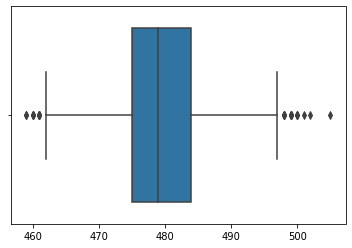

In [14]:
seaborn.boxplot(x=data_set[["feat_5"]])

#### Correlation Matrix for the Data-Set

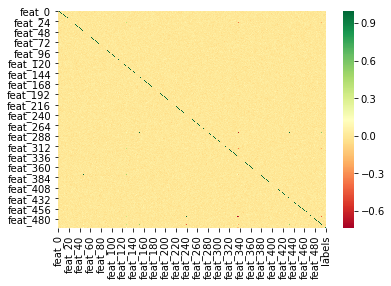

In [15]:
corr_matrix=data_set.corr()
seaborn.heatmap(corr_matrix,cmap="RdYlGn")

#### Pairplot for 1) Outliers 2)Distribution of the data 3)Distinguish Continuous and Categorical features

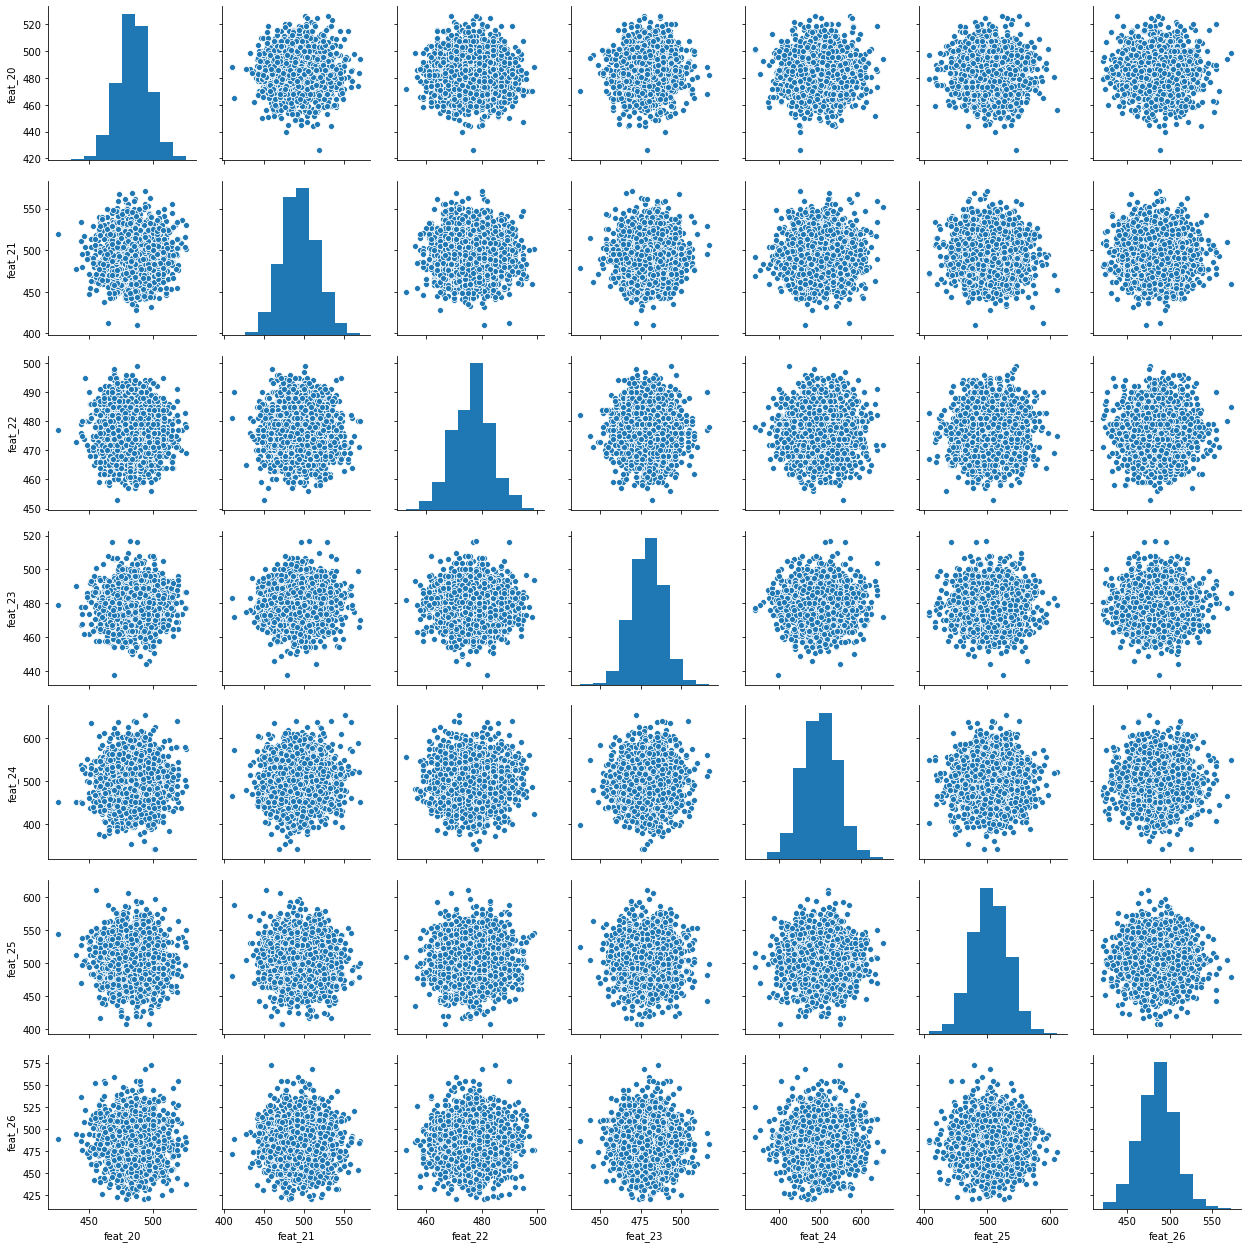

In [16]:
#data_set_np=np.ndarray(data_set)
seaborn.pairplot(data_set[['feat_20','feat_21','feat_22','feat_23','feat_24','feat_25','feat_26']])
print()

Task 2: Use scikit-learn's logistic regression to establish a baseline model. We are not expecting this model to perform well, we just want to know what is the highest accuracy that we can achieve without doing any feature engineering and/or parameter tuning. (5 points)

In [17]:
# Calculation the accuracy of the base-line model
print("Accuracy of the logistic regression without feature engineering is",logistic_regression(train,test))

Accuracy of the logistic regression without feature engineering is 0.59


Task 3: Feature engineering. On this task you'll write code to modify your features such that the model can achieve a higher accuracy. You are free to modify the data as you want, but a rationale has to be provided for each modification. Additionally, if you are using anything that has not been convered in class, write a brief description of how the function works. Note that copy/pasting a function's docstring is not what we are asking and we will take off points if this is what you do. (20 points)

Task 4: Model building & evaluation. Train at least 4 models:


1.   Neural network (any type of NN is fine)
2.   Decision tree (can be a plain decision tree, random forest, gradient boosted trees, etc.)
3.   Support vector machine
4.   Your choice of Naive Bayes or K-nearest neighbors

For model 4, briefly (no more than 2 paragraphs) describe how the model works. 

Part of your grade will depend on how your best model performs against the best model of all the classmates, as determined by the accuracy achieved using the test set. You are encouraged to share your best model's accuracy on Piazza, but not which feature engineering or model tuning steps you took to achieve it. (60 points)

#### Feature Engineering1: Removing highly correlated column

In [18]:
corr_matrix_1=np.array(corr_matrix)
highcorrcomb1=[]
highcorrcomb2=[]
for i in range(corr_matrix.shape[0]):
    for j in range(i+1,corr_matrix.shape[1]):
        if corr_matrix_1[i][j]>0.9 and i !=j:
            highcorrcomb1.append(str(i))
            highcorrcomb2.append(str(j))
            
highcorrcomb1=["feat_"+str(i) for i in highcorrcomb1]
highcorrcomb2=["feat_"+str(i) for i in highcorrcomb2]
print("The highly correlated columns are")
print(highcorrcomb1)
print(highcorrcomb2)

print("removing one set of columns...")
#geeting a new dataset
dataset_nc=data_set.drop(highcorrcomb1,axis=1)
train_nc=train.drop(highcorrcomb1,axis=1)
test_nc=test.drop(highcorrcomb1,axis=1)
print("The resultant size of the data set is",dataset_nc.shape)
print(".")
print(".")
print(".")
print(".")
print("checking the resultant dataset")
corr_nc=np.array(dataset_nc.corr())
highcorrcomb_1=[]
highcorrcomb_2=[]
for i in range(corr_nc.shape[0]):
    for j in range(i+1,corr_nc.shape[1]):
        if corr_nc[i][j]>0.9 and i !=j:
            highcorrcomb_1.append(str(i))
            highcorrcomb_2.append(str(j))
print("column numbers with high correlation",highcorrcomb_2)
print("There are no more highly correlated column in the data set")

The highly correlated columns are
['feat_28', 'feat_28', 'feat_48', 'feat_64', 'feat_105', 'feat_153', 'feat_153', 'feat_241', 'feat_281', 'feat_318', 'feat_442', 'feat_453']
['feat_318', 'feat_451', 'feat_378', 'feat_336', 'feat_128', 'feat_281', 'feat_433', 'feat_475', 'feat_433', 'feat_451', 'feat_472', 'feat_493']
removing one set of columns...
The resultant size of the data set is (2600, 491)
.
.
.
.
checking the resultant dataset
column numbers with high correlation []
There are no more highly correlated column in the data set


#### Fitting the 4 models to check accuracy after removing the correlated columns

In [19]:
#Support Vector Machine

print("Accuracy of the SVM model after removing the correlated columns is ",svm(train_nc,test_nc))

#K-Nearest Neighbours
print("Accuracy of the KNN model after removing the correlated columns is ",knn(train_nc,test_nc,17))

#Decision Tree
print("Accuracy of the decision tree model after removing the correlated columns is ",decision_tree(train_nc,test_nc))

#Neural Network
print("Accuracy of the Neural Network model after removing the correlated columns is ",NeuralNet(train_nc,test_nc)[1])

Accuracy of the SVM model after removing the correlated columns is  0.5
Accuracy of the KNN model after removing the correlated columns is  0.6316666666666667
Accuracy of the decision tree model after removing the correlated columns is  0.7316666666666667





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








600/600 [==============================] - 0s 99us/step
Accuracy of the Neural Network model after removing the correlated columns is  0.5000000007947286


#### Feature Engineering 1,2 : replacing the outliers with the mean values

In [20]:
print("Normalizing the features and treating the outliers by giving less importance")
RS_rgsr=StandardScaler()

train_nc_norm=pd.DataFrame(RS_rgsr.fit_transform(train_nc))
train_nc_norm.columns=train_nc.columns


test_nc_norm=pd.DataFrame(RS_rgsr.fit_transform(test_nc))
test_nc_norm.columns=test_nc.columns



#Testing the accuracy after normalizing
#Support Vector Machine

print("Accuracy of the SVM model after removing the correlated columns and normalizing is ",svm(train_nc_norm,test_nc_norm))

#K-Nearest Neighbours
print("Accuracy of the KNN model after removing the correlated columns and normalizing is ",knn(train_nc_norm,test_nc_norm,17))

#Decision Tree
print("Accuracy of the decision tree model after removing the correlated and normalizing columns is ",decision_tree(train_nc_norm,test_nc_norm))

#Neural Network
print("Accuracy of the Neural Network model after removing the correlated columns and normalizing is ",NeuralNet(train_nc_norm,test_nc_norm)[1])

Normalizing the features and treating the outliers by giving less importance
Accuracy of the SVM model after removing the correlated columns and normalizing is  0.5816666666666667
Accuracy of the KNN model after removing the correlated columns and normalizing is  0.51
Accuracy of the decision tree model after removing the correlated and normalizing columns is  0.75
600/600 [==============================] - 0s 144us/step
Accuracy of the Neural Network model after removing the correlated columns and normalizing is  0.5000000007947286


##### Feature Engineering 1,2,3 : Reducing the number of features to 25 by taking highly correlated variables with the output

In [21]:
# finding co-relation of data after removing the correlated columns and normalizing

print("Selecting the columns that are highly correlated with the labels")
dataset_nc_norm=pd.concat([train_nc_norm,test_nc_norm],axis=0)
corr_nc_norm=np.array(dataset_nc_norm.corr())
lastColCorr=a=np.array(corr_nc_norm[:][corr_nc_norm.shape[1]-1])
features=a.argsort()[-21:][::-1][1:]
features=["feat_"+str(i) for i in features]
features.append("labels")
print("Columns are:",features)
print(".")
print(".")
print(".")
train_norm_feat=train_nc_norm[features]
test_norm_feat=test_nc_norm[features]

#Testing the accuracy after taking columns highly corelated with label

print("Testing the accuracy after taking columns highly corelated with label")
print(".")
print(".")
#Support Vector Machine
print("Accuracy of the SVM model after taking columns highly corelated with label and normalizing is ",svm(train_norm_feat,test_norm_feat))

#K-Nearest Neighbours
print("Accuracy of the KNN model after taking columns highly corelated with label and normalizing is ",knn(train_norm_feat,test_norm_feat,17))

#Decision Tree
print("Accuracy of the decision tree model after taking columns highly corelated with label and normalizing columns is ",decision_tree(train_norm_feat,test_norm_feat))

#Neural Network
print("Accuracy of the Neural Network model after taking columns highly corelated with label and normalizing is ",NeuralNet(train_norm_feat,test_norm_feat)[1])

Selecting the columns that are highly correlated with the labels
Columns are: ['feat_465', 'feat_124', 'feat_370', 'feat_416', 'feat_325', 'feat_484', 'feat_376', 'feat_321', 'feat_4', 'feat_159', 'feat_191', 'feat_242', 'feat_179', 'feat_423', 'feat_487', 'feat_444', 'feat_446', 'feat_209', 'feat_436', 'feat_240', 'labels']
.
.
.
Testing the accuracy after taking columns highly corelated with label
.
.
Accuracy of the SVM model after taking columns highly corelated with label and normalizing is  0.5266666666666666
Accuracy of the KNN model after taking columns highly corelated with label and normalizing is  0.515
Accuracy of the decision tree model after taking columns highly corelated with label and normalizing columns is  0.515
600/600 [==============================] - 0s 186us/step
Accuracy of the Neural Network model after taking columns highly corelated with label and normalizing is  0.5000000007947286


#### Feature Engineering 1,2,4: Random Forest Feature Importance to get best set of features to predict

In [0]:
def feat_imp(train,test):
    
    rf_rgsr_main=RandomForestClassifier(n_estimators = 1000, random_state = 25,max_depth=10)
    x_train=train.drop(["labels"],axis=1)
    y_train=train[["labels"]]
    
    x_test=test.drop(["labels"],axis=1)
    y_test=test[["labels"]]
    
    number_of_features=[5,10,15,20,25,30,35,40]
    rf_rgsr_main.fit(x_train,y_train)
    
    score=[]
    rf_rgsr=RandomForestClassifier(n_estimators = 200, random_state = 25,max_depth=10)
    for i in number_of_features:
        feature_importances = pd.DataFrame(rf_rgsr_main.feature_importances_,index = x_train.columns,columns=["feat_imp"])
        sort_feat=feature_importances.sort_values(by="feat_imp",ascending=False)
        feat_names=list(sort_feat[:i].index)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
        x_train_temp=x_train[feat_names]
        x_test_temp=x_test[feat_names]
        rf_rgsr.fit(x_train_temp,y_train)
        score=rf_rgsr.score(x_test_temp,y_test)
        print("The Accuracy with ",i," features is ",score)
    return sort_feat

In [23]:
sort_feat=feat_imp(train_nc_norm,test_nc_norm)

The Accuracy with  5  features is  0.8083333333333333
The Accuracy with  10  features is  0.885
The Accuracy with  15  features is  0.86
The Accuracy with  20  features is  0.85
The Accuracy with  25  features is  0.8383333333333334
The Accuracy with  30  features is  0.8216666666666667
The Accuracy with  35  features is  0.7933333333333333
The Accuracy with  40  features is  0.7983333333333333


#### As we can see the highest accuracy is with 10 features

In [0]:
top10_feat=list(sort_feat[:10].index)
top10_feat.append("labels")

#### Final Accuracy after removing correlated columns, normalizing, getting top 10 highly important features

In [25]:
train_norm_nc_top10=train_nc_norm[top10_feat]
test_norm_nc_top10=test_nc_norm[top10_feat]

#Support Vector Machine
print("Accuracy of the SVM model after taking columns highly corelated with label and normalizing is ",svm(train_norm_nc_top10,test_norm_nc_top10))

#K-Nearest Neighbours
print("Accuracy of the KNN model after taking columns highly corelated with label and normalizing is ",knn(train_norm_nc_top10,test_norm_nc_top10,6))

#Decision Tree
print("Accuracy of the decision tree model after taking columns highly corelated with label and normalizing columns is ",decision_tree(train_norm_nc_top10,test_norm_nc_top10))

#Neural Network
print("Accuracy of the Neural Network model after taking columns highly corelated with label and normalizing is ",NeuralNet(train_norm_nc_top10,test_norm_nc_top10)[1])

Accuracy of the SVM model after taking columns highly corelated with label and normalizing is  0.8266666666666667
Accuracy of the KNN model after taking columns highly corelated with label and normalizing is  0.8933333333333333
Accuracy of the decision tree model after taking columns highly corelated with label and normalizing columns is  0.84
600/600 [==============================] - 0s 309us/step
Accuracy of the Neural Network model after taking columns highly corelated with label and normalizing is  0.5000000007947286


#### K-Nearest Neighbours- Question4 Explanation

K-Nearest Neighbours works very good for classification problems. The classification of the data point increases as the k increases because the boundary separating the datapoint becomes smoother as k increase. But further increase in k may lead to overfitting and results in less test/validation accuracy

Working of the algorithm

1. get the data and value of k
2. First it calculates the distance of each test data point with all other train data point and stores in a relevant data structure
3. After this the algorithm sorts the data structure and get the top k number of rows
4. Returns mode of the top k rows in case of the classification problem

Here, we get accuracy of 89.33% in case of KNN algorithm where k=6. This algorithm works well because dataset is small and mainly focuses on finding similarity between the datapoints to predict. 
The running time of the algorithm is n^2 which is fails when you work with the huge data. 